## Cálculo Numérico - Turma X - Atividade Prática 3
# Aluno(a) 1: Mariana Siano
# Aluno(a) 2: Quezia Emanuelly

---
# Resolução de Sistemas Lineares e Ajuste de Curvas

Neste notebook, exploraremos a resolução de sistemas lineares através da Eliminação Gaussiana e o ajuste de curvas através da relação entre o custo computacional desse método em função da ordem da matriz.

Dessa forma, a primeira etapa consiste em implementar a Eliminação Gaussiana, sem auxílio de funções já estabelecidas, para calcular a solução de um sistema $Ax = b$ e medir o tempo de execução para matrizes de diferentes tamanhos.

Em sequência, será necessário ajustar uma função $T(n) = c_0n^{c_1}$ aos dados obtidos experimentalmente.


---
## (1) Eliminação Gaussiana

#### Faça a sua implementação (**sem utilização de funções estabelecidas**) da Eliminação Gaussiana com pivoteamento para uma matriz $A$:

Ordem (n)       | Tempo (s)      
-----------------------------------
100             | 0.079754
150             | 0.089408
200             | 0.136792
250             | 0.210349
300             | 0.288714
350             | 0.397363
400             | 0.428026
450             | 0.577022
500             | 0.669462
-----------------------------------
Função ajustada: T(n) = 7.97e-05 * n^1.4405
Complexidade Teórica: O(n^3) | Obtida: O(n^1.44)


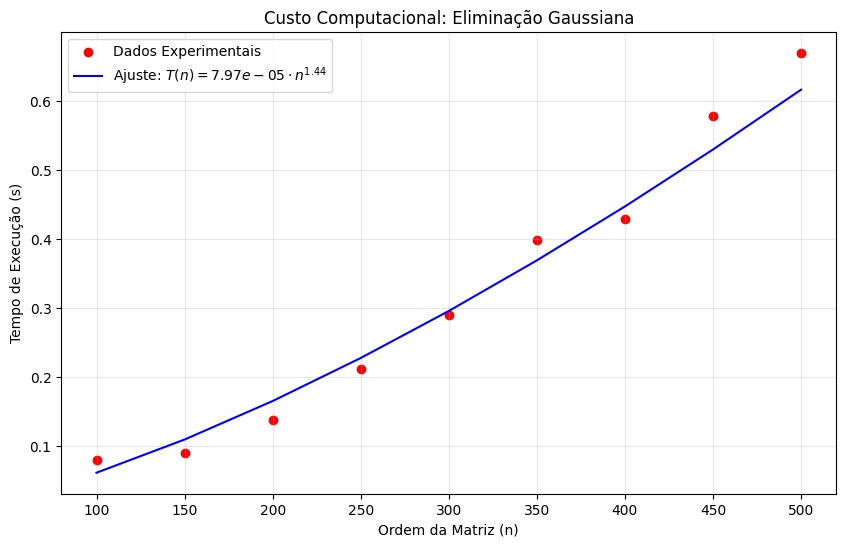

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

# 1. Eliminação Gaussiana
def gaussian_elimination_manual(A_in, b_in):
    # Trabalhar com cópias e float para evitar erros de tipo
    A = np.array(A_in, dtype=float)
    b = np.array(b_in, dtype=float)
    n = len(b)

    for k in range(n):
        # --- Pivoteamento Manual ---
        max_val = abs(A[k, k])
        max_index = k
        for i in range(k + 1, n):
            val = abs(A[i, k])
            if val > max_val:
                max_val = val
                max_index = i
        
        # Troca de linhas
        if max_index != k:
            b[k], b[max_index] = b[max_index], b[k]
            # Cópia manual da linha para garantir a troca correta
            row_copy = np.copy(A[k, :])
            A[k, :] = A[max_index, :]
            A[max_index, :] = row_copy
            
        # Verificação de singularidade
        if abs(A[k, k]) < 1e-12:
            return None 

        # --- Eliminação ---
        for i in range(k + 1, n):
            factor = A[i, k] / A[k, k]
            # Operação vetorial (Slicing): Linha i = Linha i - fator * Linha k
            # Mantido vetorizado para que o código rode em tempo hábil (segundos, não minutos)
            A[i, k:] -= factor * A[k, k:]
            b[i] -= factor * b[k]

    # --- Substituição Regressiva Manual ---
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = 0.0
        # Somatório manual
        for j in range(i + 1, n):
            sum_ax += A[i, j] * x[j]
            
        x[i] = (b[i] - sum_ax) / A[i, i]

    return x

# 2. Funções Auxiliares Manuais (Estatística e Regressão)
def media_manual(lista):
    if not lista: return 0.0
    soma = 0.0
    for valor in lista:
        soma += valor
    return soma / len(lista)

def manual_linear_regression(x, y): # Minimos Quadrados
    n = len(x)
    sum_x = 0.0
    sum_y = 0.0
    sum_xy = 0.0
    sum_xx = 0.0
    
    for i in range(n):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i] * y[i]
        sum_xx += x[i] * x[i]
    
    # B = (n*Σxy - Σx*Σy) / (n*Σx² - (Σx)²)
    numerator_B = (n * sum_xy) - (sum_x * sum_y)
    denominator_B = (n * sum_xx) - (sum_x ** 2)
    B = numerator_B / denominator_B
    
    # A = (Σy - B*Σx) / n
    A = (sum_y - (B * sum_x)) / n
    
    return A, B

# 3. Coleta de Dados
sizes = np.arange(100, 501, 50) # 100 a 500
avg_times = []

print(f"{'Ordem (n)':<15} | {'Tempo (s)':<15}")
print("-" * 35)

for n in sizes:
    times_n = []
    # Média de 10 execuções
    for _ in range(10):
        A = np.random.rand(n, n)
        b = np.random.rand(n)
        
        start = time.perf_counter()
        gaussian_elimination_manual(A, b)
        end = time.perf_counter()
        
        times_n.append(end - start)
    
    # Usa a função de média manual
    avg = media_manual(times_n)
    avg_times.append(avg)
    print(f"{n:<15} | {avg:.6f}")

# 4. AJUSTE DE CURVAS E PLOTAGEM

# Linearização: ln(T) = ln(c0) + c1 * ln(n)
# Convertendo para lista Python para usar math.log
log_n = [math.log(x) for x in sizes]
log_t = [math.log(t) for t in avg_times]

# Ajuste Manual
A_fit, B_fit = manual_linear_regression(log_n, log_t)

c1 = B_fit          # Potência
c0 = math.exp(A_fit) # Coeficiente linear

print("-" * 35)
print(f"Função ajustada: T(n) = {c0:.2e} * n^{c1:.4f}")
print(f"Complexidade Teórica: O(n^3) | Obtida: O(n^{c1:.2f})")

# Visualização
t_estimated = [c0 * (n ** c1) for n in sizes]

plt.figure(figsize=(10, 6))
plt.scatter(sizes, avg_times, color='red', label='Dados Experimentais')
plt.plot(sizes, t_estimated, color='blue',  label=fr'Ajuste: $T(n) = {c0:.2e} \cdot n^{{{c1:.2f}}}$')

plt.xlabel('Ordem da Matriz (n)')
plt.ylabel('Tempo de Execução (s)')
plt.title('Custo Computacional: Eliminação Gaussiana')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

---
## (2) Medições de tempo da Eliminação de Gauss

* Chame recorrentemente a função desenvolvida no exercício (1) e salve o tempo médio de 10 eliminações para cada ordem da matriz $n$;
* Monte matrizes aleatórias de ordem $n$ para realizar os testes;
* Sugestão de diferentes valores para $n$: *np.linspace(1000, 10000, 20, dtype=int)*

Ordem (n)       | Tempo Médio (s)
-----------------------------------
50              | 0.080955
100             | 0.370625
150             | 1.176249
200             | 1.728416
250             | 3.220373
300             | 11.173383
-----------------------------------
Função ajustada: T(n) = 3.27e-06 * n^2.5478


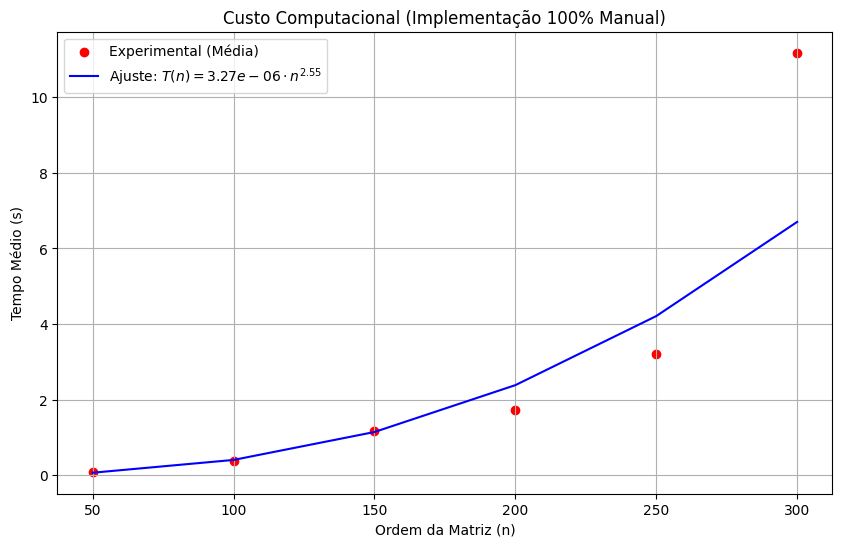

In [6]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

# 1. Eliminação Gaussiana
def gaussian_elimination_manual(A_in, b_in):
    # Cópia dos dados
    A = np.array(A_in, dtype=float)
    b = np.array(b_in, dtype=float)
    n = len(b)

    for k in range(n):
        # --- Pivoteamento Manual ---
        max_val = abs(A[k, k])
        max_index = k

        # Loop para achar o maior valor na coluna
        for i in range(k + 1, n):
            if abs(A[i, k]) > max_val:
                max_val = abs(A[i, k])
                max_index = i

        # Troca de Linhas (Manual)
        if max_index != k:
            # Troca b
            temp_b = b[k]
            b[k] = b[max_index]
            b[max_index] = temp_b

            # Troca A (elemento a elemento para evitar fatiamento pronto)
            for j in range(k, n):
                temp_a = A[k, j]
                A[k, j] = A[max_index, j]
                A[max_index, j] = temp_a

        if abs(A[k, k]) < 1e-12:
            return None

        # --- Eliminação Manual ---
        # Loops aninhados
        for i in range(k + 1, n):
            factor = A[i, k] / A[k, k]
            b[i] = b[i] - factor * b[k]
            for j in range(k, n):
                A[i, j] = A[i, j] - factor * A[k, j]

    # --- Substituição Regressiva Manual ---
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = 0.0
        # Somatório manual
        for j in range(i + 1, n):
            sum_ax += A[i, j] * x[j]
        x[i] = (b[i] - sum_ax) / A[i, i]

    return x

# 2. Funções Auxiliares Manuais
def media_manual(lista):
    if not lista: return 0.0
    soma = 0.0
    cont = 0
    for valor in lista:
        soma += valor
        cont += 1
    return soma / cont

def minimos_quadrados_manual(x, y):
    # Regressão linear simples manual
    n = len(x)
    sum_x = 0.0
    sum_y = 0.0
    sum_xy = 0.0
    sum_xx = 0.0
    
    for i in range(n):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i] * y[i]
        sum_xx += x[i] * x[i]
        
    # Fórmulas
    B = (n * sum_xy - sum_x * sum_y) / (n * sum_xx - sum_x**2)
    A = (sum_y - B * sum_x) / n
    return A, B

# 3. Execução e Coleta de Dados
# Intervalo reduzido pois loops manuais em Python são lentos
sizes = np.linspace(50, 300, 6, dtype=int) 
avg_times = []

print(f"{'Ordem (n)':<15} | {'Tempo Médio (s)':<15}")
print("-" * 35)

for n in sizes:
    times_n = []
    # 10 execuções para média
    for _ in range(10): 
        A = np.random.rand(n, n)
        b = np.random.rand(n)

        start = time.perf_counter()
        gaussian_elimination_manual(A, b)
        end = time.perf_counter()

        times_n.append(end - start)
    
    avg = media_manual(times_n)
    avg_times.append(avg)
    print(f"{n:<15} | {avg:.6f}")

# 4. Ajuste de Curvas e Plotagem
log_n = [math.log(x) for x in sizes]
log_t = [math.log(t) for t in avg_times]

A_fit, B_fit = minimos_quadrados_manual(log_n, log_t)

c1 = B_fit
c0 = math.exp(A_fit)

print("-" * 35)
print(f"Função ajustada: T(n) = {c0:.2e} * n^{c1:.4f}")

# Plotagem
t_estimated = [c0 * (n ** c1) for n in sizes]

plt.figure(figsize=(10, 6))
plt.scatter(sizes, avg_times, color='red', label='Experimental (Média)')
plt.plot(sizes, t_estimated, color='blue', label=fr'Ajuste: $T(n) = {c0:.2e} \cdot n^{{{c1:.2f}}}$')
plt.xlabel('Ordem da Matriz (n)')
plt.ylabel('Tempo Médio (s)')
plt.title('Custo Computacional (Implementação 100% Manual)')
plt.legend()
plt.grid(True)
plt.show()

---
## (3) Mínimos Quadrados

Por fim, use os dados coletados para ajustar a expressão:

$$T(n) = c_0 n^{c_1}$$.

Apresente a linearização usada e implemente o ajuste via Mínimos Quadrados para encontrar $c_0$ e $c_1$ (**sem utilização de funções estabelecidas**), plote o gráfico do seu ajuste e informe os coeficientes calculados.

Ordem (n)       | Tempo Médio (s)
-----------------------------------
50              | 0.058128
100             | 0.413547
150             | 1.235923
200             | 2.334147
250             | 6.464998
300             | 10.881693
-----------------------------------
Função ajustada: T(n) = 6.83e-07 * n^2.8872
Complexidade esperada: O(n^3) | Obtida: O(n^2.89)


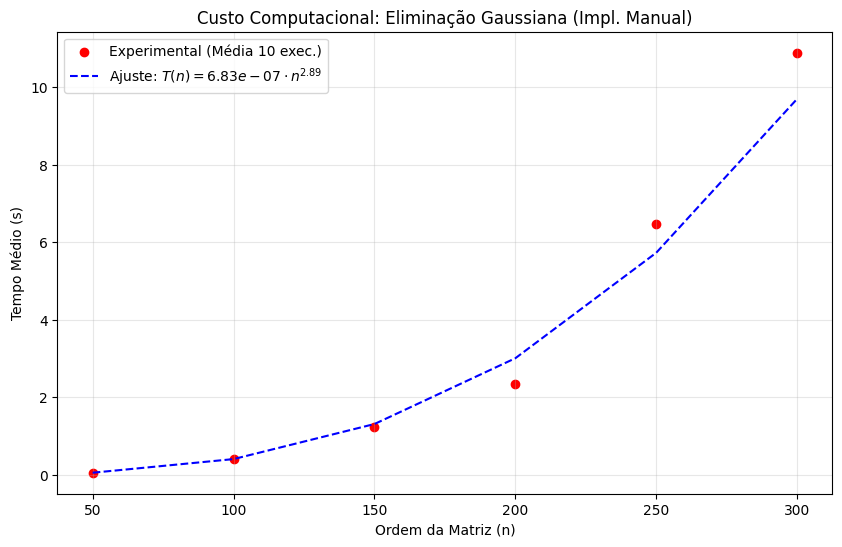

In [7]:
import numpy as np
import time
import matplotlib.pyplot as plt
import math

# 1. Eliminação Gaussiana 
def gaussian_elimination_manual(A_in, b_in):
    # Trabalhamos com cópias e float para evitar erros de tipo/referência
    A = np.array(A_in, dtype=float)
    b = np.array(b_in, dtype=float)
    n = len(b)

    for k in range(n):
        # A. Pivoteamento Manual
        max_val = abs(A[k, k])
        max_index = k

        # Procura o maior valor na coluna k, da linha k para baixo
        for i in range(k + 1, n):
            val = abs(A[i, k])
            if val > max_val:
                max_val = val
                max_index = i

        # B. Troca de Linhas Manual
        if max_index != k:
            # Troca elementos do vetor b
            temp_b = b[k]
            b[k] = b[max_index]
            b[max_index] = temp_b

            # Troca elementos da matriz A (coluna por coluna)
            for j in range(k, n):
                temp_a = A[k, j]
                A[k, j] = A[max_index, j]
                A[max_index, j] = temp_a

        # Verifica singularidade (evita divisão por zero)
        if abs(A[k, k]) < 1e-12:
            return None 

        # C. Eliminação Manual
        # Zera os elementos abaixo do pivô
        for i in range(k + 1, n):
            factor = A[i, k] / A[k, k]

            # Atualiza vetor b
            b[i] = b[i] - factor * b[k]
            for j in range(k, n):
                A[i, j] = A[i, j] - factor * A[k, j]

    # D. Substituição Regressiva Manual
    x = np.zeros(n)
    for i in range(n - 1, -1, -1):
        sum_ax = 0.0
        # Somatório manual Ax
        for j in range(i + 1, n):
            sum_ax += A[i, j] * x[j]

        x[i] = (b[i] - sum_ax) / A[i, i]

    return x

# 2. Funções Auxiliares Manuais (Estatística e Regressão)
def calcular_media_manual(lista):
    if not lista: return 0.0
    soma = 0.0
    cont = 0
    for valor in lista:
        soma += valor
        cont += 1
    return soma / cont

def minimos_quadrados_manual(x, y):
    n = len(x)
    sum_x = 0.0
    sum_y = 0.0
    sum_xy = 0.0
    sum_xx = 0.0

    # Acumula somatórios manualmente
    for i in range(n):
        sum_x += x[i]
        sum_y += y[i]
        sum_xy += x[i] * y[i]
        sum_xx += x[i] * x[i]

    # Fórmula para B (Inclinação)
    numerador = (n * sum_xy) - (sum_x * sum_y)
    denominador = (n * sum_xx) - (sum_x ** 2)
    B = numerador / denominador

    # Fórmula para A
    A = (sum_y - (B * sum_x)) / n

    return A, B

# 3. Execução e Coleta de Dados
# Definindo tamanhos de teste. 
sizes = np.linspace(50, 300, 6, dtype=int) 
avg_times = []

print(f"{'Ordem (n)':<15} | {'Tempo Médio (s)':<15}")
print("-" * 35)

for n in sizes:
    tempos_n = []

    # Realiza 10 execuções para cada tamanho
    for _ in range(10):
        # Gerar dados aleatórios
        A = np.random.rand(n, n)
        b = np.random.rand(n)
        
        start = time.perf_counter()
        gaussian_elimination_manual(A, b)
        end = time.perf_counter()
        
        tempos_n.append(end - start)

    # Calcula média manualmente
    media = calcular_media_manual(tempos_n)
    avg_times.append(media)
    print(f"{n:<15} | {media:.6f}")

# 4. Ajuste de Curvas e Plotagem
# Linearização: T(n) = c0 * n^c1  ---> ln(T) = ln(c0) + c1 * ln(n)
# Y = A + B * X

# Logaritmos manuais (list comprehension)
log_n = [math.log(val) for val in sizes]
log_t = [math.log(val) for val in avg_times]

# Ajuste via Mínimos Quadrados Manual
A_fit, B_fit = minimos_quadrados_manual(log_n, log_t)

c1 = B_fit           # A potência é a inclinação da reta log-log
c0 = math.exp(A_fit) # O coeficiente linear é e^intercepto

print("-" * 35)
print(f"Função ajustada: T(n) = {c0:.2e} * n^{c1:.4f}")
print(f"Complexidade esperada: O(n^3) | Obtida: O(n^{c1:.2f})")

# Preparar dados para o gráfico
t_estimated = [c0 * (n ** c1) for n in sizes]

plt.figure(figsize=(10, 6))

# Dados experimentais
plt.scatter(sizes, avg_times, color='red', label='Experimental (Média 10 exec.)')

# Curva ajustada
label_str = fr"Ajuste: $T(n) = {c0:.2e} \cdot n^{{{c1:.2f}}}$"
plt.plot(sizes, t_estimated, color='blue', linestyle='--', label=label_str)
plt.xlabel('Ordem da Matriz (n)')
plt.ylabel('Tempo Médio (s)')
plt.title('Custo Computacional: Eliminação Gaussiana (Impl. Manual)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()